# Homework

## Problem 1


In [12]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

def grab_image(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
X = np.concatenate([grab_image('/nfshome/sandbox/xception_example/images/image_%d.JPEG'%(i)) for i in range(100)])

Y = np.loadtxt('/nfshome/sandbox/xception_example/class_labels.csv')
Y = keras.utils.to_categorical(Y)

# first 10 in Y and X
print(Y[0:10,:])
X.shape

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


(100, 100, 100, 3)

In [13]:
model = keras.Sequential()
# Three input channels
model.add(keras.layers.Conv2D(25, kernel_size=(5, 5),
            activation='relu',
            input_shape=[X.shape[1],
            X.shape[2],
            X.shape[3]]))
model.add(keras.layers.Conv2D(50, (5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(5, 5)))
model.add(keras.layers.Conv2D(75, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.Conv2D(100, (5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(5, 5)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(Y.shape[1], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 25)        1900      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 92, 92, 50)        31300     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 50)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 75)        93825     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 100)       187600    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 100)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 2, 100)         0         
__________

In [18]:
history = model.fit(X, Y,
                    batch_size=60,
                    epochs=50,
                    verbose=1)

Epoch 1/50
100/100 [==============================] - 11s 106ms/step - loss: 0.6578 - acc: 0.6000
Epoch 2/50
100/100 [==============================] - 10s 103ms/step - loss: 0.6287 - acc: 0.6700
Epoch 3/50
100/100 [==============================] - 10s 104ms/step - loss: 0.6451 - acc: 0.6400
Epoch 4/50
100/100 [==============================] - 11s 105ms/step - loss: 0.6221 - acc: 0.6400
Epoch 5/50
100/100 [==============================] - 10s 96ms/step - loss: 0.6326 - acc: 0.6600
Epoch 6/50
100/100 [==============================] - 9s 91ms/step - loss: 0.6303 - acc: 0.6100
Epoch 7/50
100/100 [==============================] - 8s 78ms/step - loss: 0.5937 - acc: 0.6600
Epoch 8/50
100/100 [==============================] - 8s 76ms/step - loss: 0.5944 - acc: 0.7000
Epoch 9/50
100/100 [==============================] - 8s 79ms/step - loss: 0.5893 - acc: 0.6600
Epoch 10/50
100/100 [==============================] - 8s 81ms/step - loss: 0.5428 - acc: 0.7400
Epoch 11/50
100/100 [=========

## Problem 2

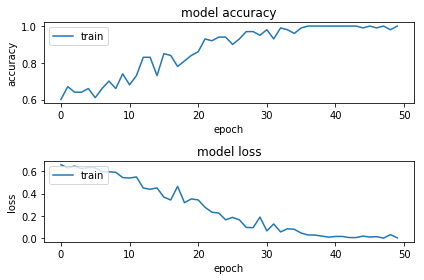

In [19]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

### Any sugestions on how to smooth out the activations, they seem to be exploding from time to time?

## Problem 3

In [21]:
def grab_image2(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
X = np.concatenate([grab_image2('/nfshome/sandbox/xception_example/images/image_%d.JPEG'%(i)) for i in range(100)])

model = Xception(weights='imagenet')

In [23]:
preds = model.predict(X[:,:,:,:])
# Decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=1)[:])

Predicted: [[('n01817953', 'African_grey', 0.44841596)], [('n02106550', 'Rottweiler', 0.29953748)], [('n02395406', 'hog', 0.14157927)], [('n02101006', 'Gordon_setter', 0.3929784)], [('n02124075', 'Egyptian_cat', 0.57858574)], [('n02127052', 'lynx', 0.2734335)], [('n02107683', 'Bernese_mountain_dog', 0.97202796)], [('n02123394', 'Persian_cat', 0.55238414)], [('n02093256', 'Staffordshire_bullterrier', 0.4646181)], [('n02123045', 'tabby', 0.27875343)], [('n02123045', 'tabby', 0.24650945)], [('n02124075', 'Egyptian_cat', 0.21868071)], [('n02096585', 'Boston_bull', 0.12376172)], [('n02124075', 'Egyptian_cat', 0.59595346)], [('n02123597', 'Siamese_cat', 0.14436458)], [('n02107312', 'miniature_pinscher', 0.09950582)], [('n02106662', 'German_shepherd', 0.38143304)], [('n02123045', 'tabby', 0.47416684)], [('n04254680', 'soccer_ball', 0.81044906)], [('n03325584', 'feather_boa', 0.72410274)], [('n03793489', 'mouse', 0.10129734)], [('n02106166', 'Border_collie', 0.21694103)], [('n02123045', 'tabby

### Checking the first 8 it did a decent job